In [15]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline  

In [52]:
medias, yerr = [], []
start, finish, step = 10, 2000, 20
for n in range(start, finish+step, step):
    
    a = np.random.rand(n, n)
    b = np.random.rand(n, 1)
        
    t_test = []
    for i in range(20):
        t = time.time()
        numpy.linalg.solve(a, b)
        t_test.append(time.time() - t)
    
    
    medias.append(np.average(t_test))
    yerr.append(np.std(t_test))

<Container object of 3 artists>

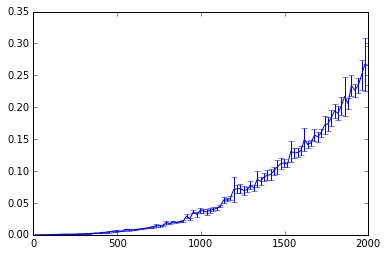

In [59]:
plt.errorbar(x, medias[:-1], yerr=yerr[:-1])